# Introduction

## Reference:

https://www.kaggle.com/nidhirastogi/intrusion-detection/data

## Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_train = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_test = df_test.drop('Unnamed: 0',axis=1)

## Exploring the data

Data has 42 columns: duration, protocol_type, src_bytes, wrong_fragment, etc.

Training set has 125973 and Test set has 10000 samples

In [ ]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


## Save training dataset and test dateaset to each df and split X and Y (xAttack, analysis features).

Using the 41 attributes from both training and testing dataset to classify whether it is an attack(DOS/R2L/Probe/U2R/Normal)[5 labels]

In [ ]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [ ]:
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r
5     NaN


## Preprocessing and one hot encoding, X is onehotencoder, Y is LabelBinarizer

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [ ]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

### X OneHotEncoding

In [ ]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Y LabelBinarizer

In [ ]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,9659.000000
mean,0.736826
std,0.655907
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,5.000000


### 1. Standard deviation
We have applied a method to exclude features with small standard deviation (small deviation). However, when the feature type is discrete, the deviation is small.

In [ ]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.010175
num_shells,0.024917
root_shell,0.038046
num_failed_logins,0.039393
num_access_files,0.068163
dst_host_srv_diff_host_rate,0.108282
diff_srv_rate,0.176517
dst_host_diff_srv_rate,0.183618
srv_diff_host_rate,0.249554


num_outbound_cmds is removed from the first because the standard deviation is zero.

In [ ]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Std picks the 10 low and stores the features in drop -> X_train_stdrop. (Will be used after ensemble feature selection)

In [ ]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


Baseline - Learn about performance with linear regression

- Linear regression

In [ ]:
from sklearn import linear_model

In [ ]:
LR = linear_model.LinearRegression()

In [ ]:
X_train = X_train.fillna(0)
LR.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.34 %


The linear regression yields only 33% probability.

### 2. Ensemble feature selection
Ensemble Modeling can see how the feature affected each model. Therefore, we tried feature selection around those features (attempt to remove Irrelevant feature).

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [ ]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

Check the feature importances to see how accurate the basic features are.

In [ ]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.752 %


In [ ]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [ ]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.757 %


In [ ]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [ ]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.746 %


In [ ]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [ ]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.764 %


Let's look at how the features affect each other through Ensemble

In [ ]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,0.006008,0.004994,0.004739,0.000328
1,protocol_type,0.004264,0.016082,0.024047,0.015091
2,service,0.004425,0.049462,0.018144,0.003609
3,flag,0.003312,0.008543,0.010913,0.002371
4,src_bytes,0.565799,0.113983,0.020722,0.372851
5,dst_bytes,0.002805,0.153287,0.011215,0.061435
6,land,0.000000,0.000000,0.000000,0.000000
7,wrong_fragment,0.004680,0.005299,0.012748,0.014607


Graphs showing the influence of features

[Text(0, 0, 'duration'),
 Text(1, 0, 'protocol_type'),
 Text(2, 0, 'service'),
 Text(3, 0, 'flag'),
 Text(4, 0, 'src_bytes'),
 Text(5, 0, 'dst_bytes'),
 Text(6, 0, 'land'),
 Text(7, 0, 'wrong_fragment'),
 Text(8, 0, 'urgent'),
 Text(9, 0, 'hot'),
 Text(10, 0, 'num_failed_logins'),
 Text(11, 0, 'logged_in'),
 Text(12, 0, 'num_compromised'),
 Text(13, 0, 'root_shell'),
 Text(14, 0, 'su_attempted'),
 Text(15, 0, 'num_root'),
 Text(16, 0, 'num_file_creations'),
 Text(17, 0, 'num_shells'),
 Text(18, 0, 'num_access_files'),
 Text(19, 0, 'is_host_login'),
 Text(20, 0, 'is_guest_login'),
 Text(21, 0, 'count'),
 Text(22, 0, 'srv_count'),
 Text(23, 0, 'serror_rate'),
 Text(24, 0, 'srv_serror_rate'),
 Text(25, 0, 'rerror_rate'),
 Text(26, 0, 'srv_rerror_rate'),
 Text(27, 0, 'same_srv_rate'),
 Text(28, 0, 'diff_srv_rate'),
 Text(29, 0, 'srv_diff_host_rate'),
 Text(30, 0, 'dst_host_count'),
 Text(31, 0, 'dst_host_srv_count'),
 Text(32, 0, 'dst_host_same_srv_rate'),
 Text(33, 0, 'dst_host_diff_srv_r

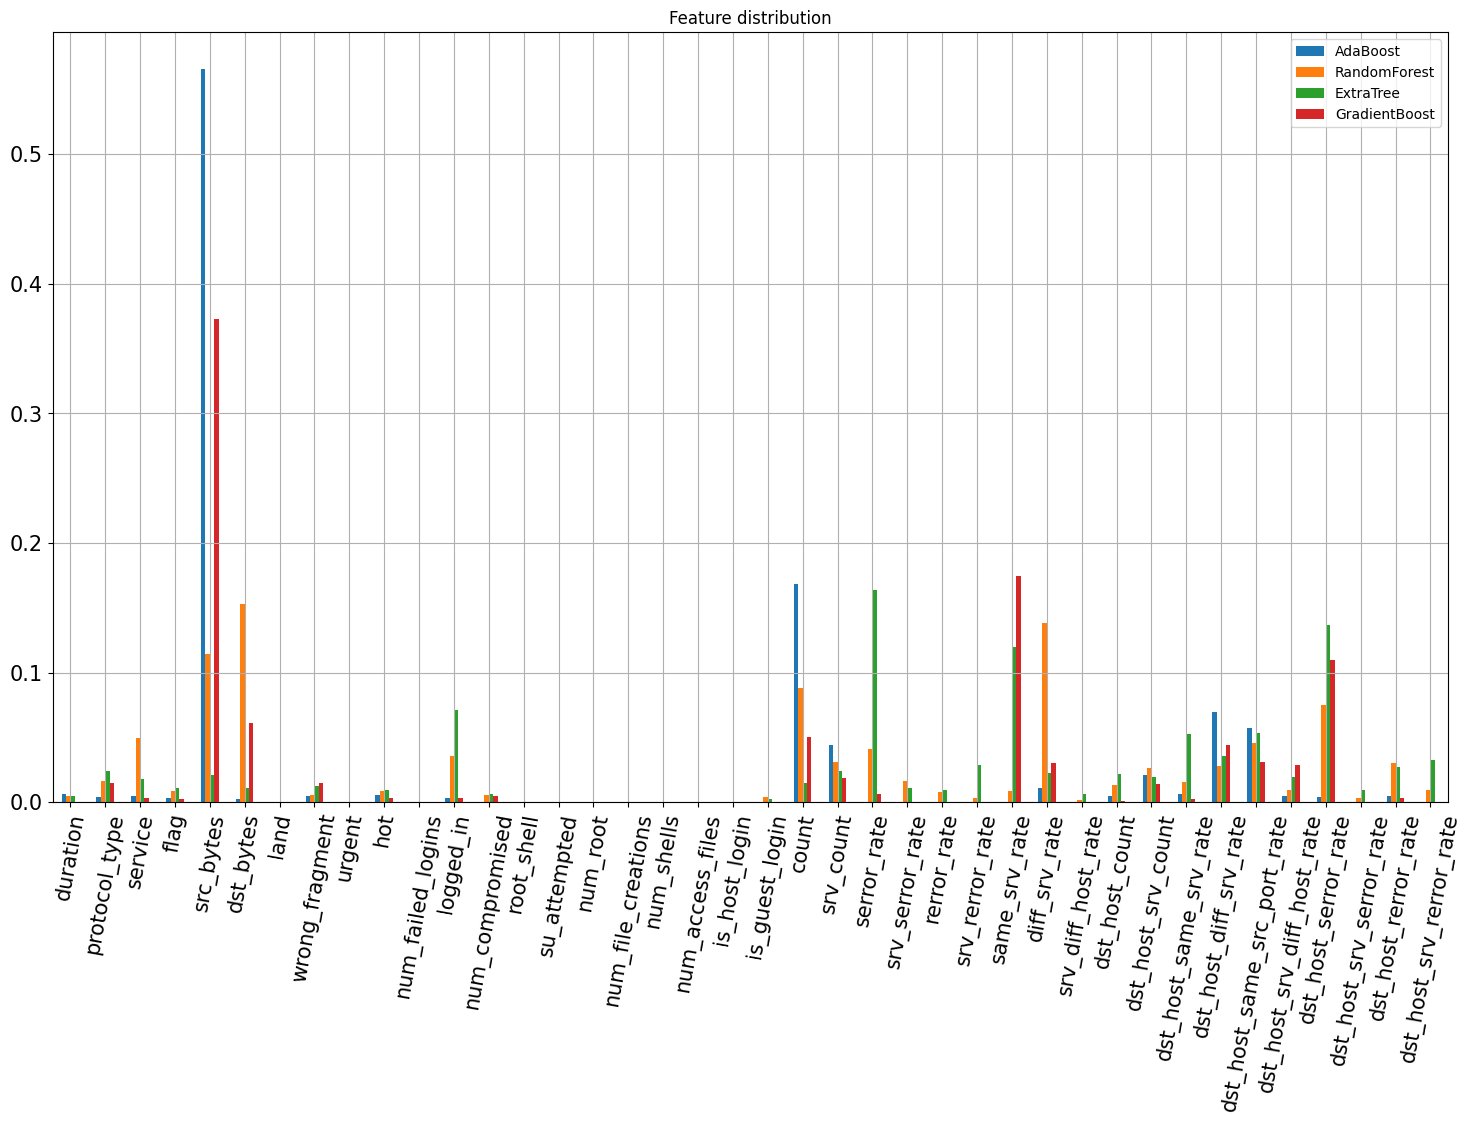

In [ ]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15,
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

#### Extract twelve features from each Ensemble model

In [ ]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

#### Delete Duplicates

In [ ]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # delete duplicate feature
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
4,src_bytes,0.565799,0.113983,0.020722,0.372851
21,count,0.168422,0.088294,0.014487,0.050344
33,dst_host_diff_srv_rate,0.069695,0.027656,0.035348,0.044192
34,dst_host_same_src_port_rate,0.057155,0.045648,0.053021,0.030878
22,srv_count,0.044343,0.030824,0.023852,0.018802
31,dst_host_srv_count,0.021161,0.026460,0.019092,0.014120
28,diff_srv_rate,0.011281,0.138553,0.022680,0.030532
32,dst_host_same_srv_rate,0.006164,0.015320,0.052428,0.002600
0,duration,0.006008,0.004994,0.004739,0.000328
9,hot,0.005919,0.008464,0.009661,0.003383


In [ ]:
selected_features = result['features'].values.tolist()
selected_features

['src_bytes',
 'count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'srv_count',
 'dst_host_srv_count',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'duration',
 'hot',
 'dst_host_srv_diff_host_rate',
 'dst_host_rerror_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'same_srv_rate',
 'logged_in',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'protocol_type',
 'dst_bytes',
 'wrong_fragment',
 'service']

#### Below are the results of training with the exception of the features with small standard deviations.

In [ ]:
X_train_stdrop = X_train_stdrop.fillna(0)
AB.fit(X_train_stdrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.759 %


In [ ]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [ ]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.747 %


In [ ]:
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [ ]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.759 %


In [ ]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [ ]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.76 %


#### Only features obtained through ensemble

In [ ]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,src_bytes,count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,srv_count,dst_host_srv_count,diff_srv_rate,dst_host_same_srv_rate,duration,hot,...,serror_rate,dst_host_serror_rate,same_srv_rate,logged_in,dst_host_srv_rerror_rate,srv_rerror_rate,protocol_type,dst_bytes,wrong_fragment,service
0,0,110,0.00,0.00,110,255,0.0,1.00,0,0,...,1.0,0.65,1.0,0,0.32,0.0,0,0,0,25
1,312,1,0.00,1.00,9,254,0.0,1.00,0,0,...,0.0,0.00,1.0,1,0.00,0.0,0,1856,0,25
2,245,5,0.00,0.01,5,255,0.0,1.00,0,0,...,0.0,0.01,1.0,1,0.00,0.0,0,2058,0,25
3,298,4,0.00,0.00,18,255,0.0,1.00,0,0,...,0.0,0.00,1.0,1,0.00,0.0,0,1267,0,25
4,740,1,0.03,0.18,1,19,0.0,0.18,0,0,...,0.0,0.00,1.0,0,0.00,0.0,0,0,0,20


### 3. Correlation
Features that have high correlation among multiple features (redundant features)
are merged or deleted. This is because if there is a large correlation between these features,
there is no need to increase the number of features.

<Axes: >

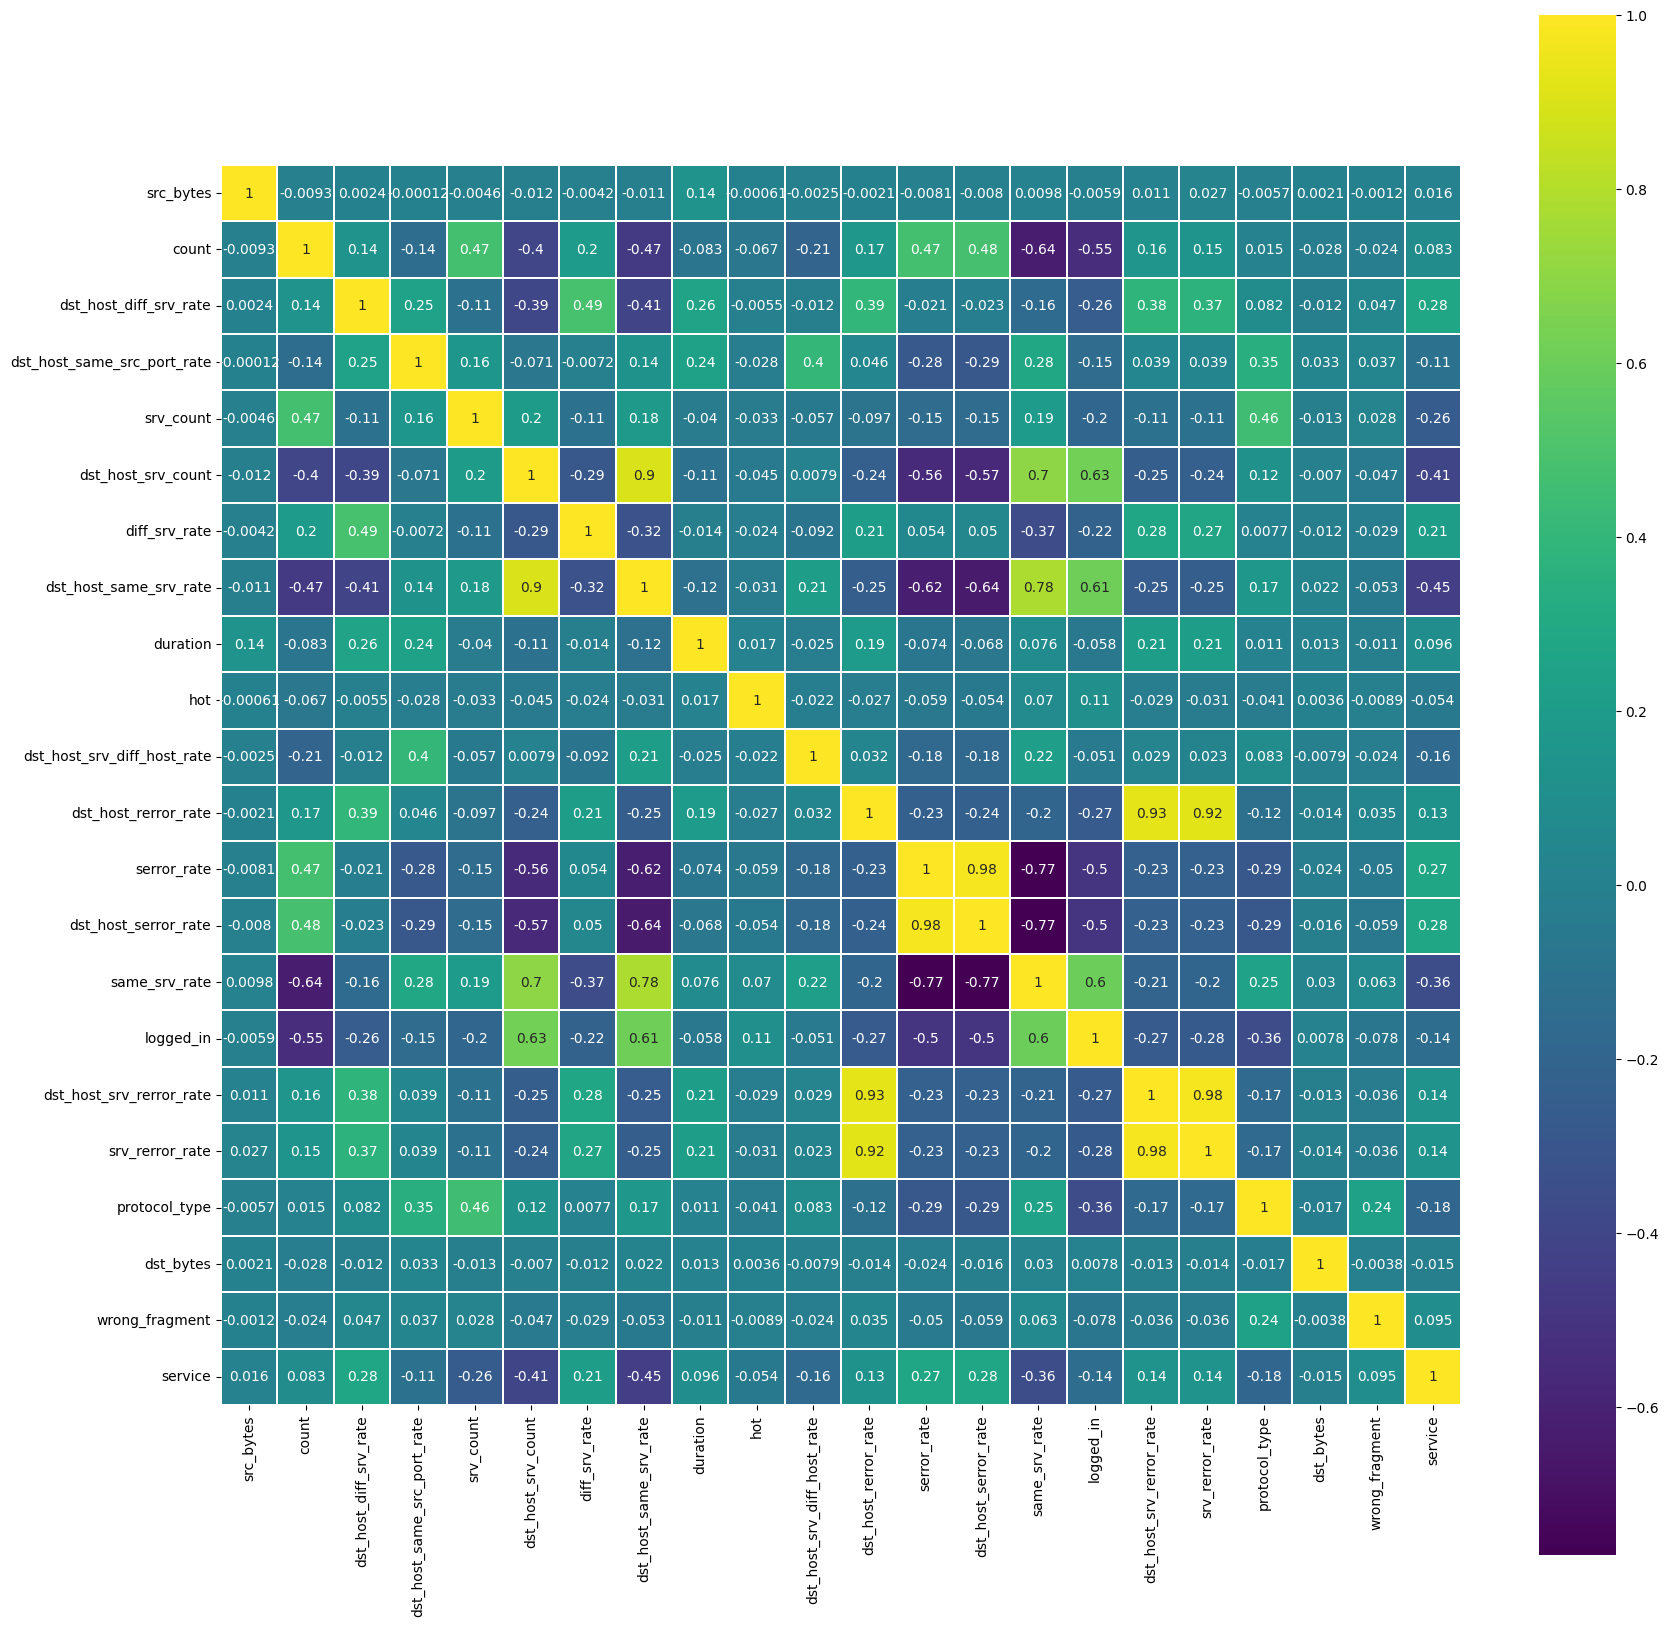

In [ ]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

#### The above graph analysis shows that the dependency is high in the following features

In [ ]:
selected2 = ['dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,src_bytes,count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,srv_count,dst_host_srv_count,diff_srv_rate,dst_host_same_srv_rate,duration,hot,dst_host_srv_diff_host_rate,dst_host_rerror_rate,same_srv_rate,logged_in,dst_host_srv_rerror_rate,srv_rerror_rate,protocol_type,dst_bytes,wrong_fragment,service
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,6.845032e+03,80.152400,0.089412,0.133167,31.730900,139.645700,0.089752,0.605769,229.263000,0.093200,0.020102,0.236296,0.739925,0.436600,0.230181,0.238538,0.278600,1.996999e+03,0.009000,35.451700
std,8.675409e+04,129.028094,0.218190,0.307154,90.353536,111.548555,0.252240,0.436278,1461.180594,0.647731,0.089353,0.389137,0.413711,0.495989,0.403294,0.418474,0.657134,2.006975e+04,0.146701,15.824769
min,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000e+00,1.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,25.000000
50%,5.400000e+01,8.000000,0.020000,0.000000,6.000000,159.500000,0.000000,0.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.400000e+01,0.000000,25.000000
75%,2.850000e+02,126.000000,0.060000,0.030000,16.000000,255.000000,0.060000,1.000000,0.000000,0.000000,0.010000,0.390000,1.000000,1.000000,0.220000,0.232500,0.000000,5.990000e+02,0.000000,50.000000
max,6.291668e+06,511.000000,1.000000,1.000000,511.000000,255.000000,1.000000,1.000000,57715.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.285078e+06,3.000000,70.000000


## 2) Modeling

#### Modeling after completion of the feature selection process (elimination of low deviation, high correlation)
#### Comparing final modeling results with features that affect ensemble modeling

### Ensemble Modeling results with final modeling impact

In [ ]:
AB.fit(X_train_cordrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [ ]:
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.761 %


In [ ]:
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [ ]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.759 %


In [ ]:
ET.fit(X_train_cordrop, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [ ]:
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.747 %


In [ ]:
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [ ]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.743 %


In [ ]:
LR.fit(X_train_cordrop, Y_train)

LinearRegression()

In [ ]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.270 %


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [ ]:
MLP.fit(X_train_cordrop, Y_train)

MLPClassifier(hidden_layer_sizes=(1000, 300, 300), shuffle=False)

In [ ]:
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.726 %


## 3) Result

As a result, feature selection and extraction did not result in high probability. I have seen 1-2% increase in accuracy, but I think the feature will be reduced and it will be able to operate a little faster and will prevent overfitting when new data comes in.

Comparing the score of each model

- first models

In [ ]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.344556
1,Adaboost,0.752100
2,RandomForest,0.757400
3,ExtraTrees,0.746300
4,GradientBoost,0.764500


- second models

In [ ]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7592
1,RandomForest,0.7467
2,ExtraTrees,0.7592
3,GradientBoost,0.7573


- final models

In [ ]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.270208
1,Adaboost,0.760600
2,RandomForest,0.758800
3,ExtraTrees,0.746500
4,GradientBoost,0.743100
5,MLP,0.725600
